In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/GoogleAds_DataAnalytics_Sales_Uncleaned.csv")

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ad_ID            2600 non-null   object 
 1   Campaign_Name    2600 non-null   object 
 2   Clicks           2488 non-null   float64
 3   Impressions      2546 non-null   float64
 4   Cost             2503 non-null   object 
 5   Leads            2552 non-null   float64
 6   Conversions      2526 non-null   float64
 7   Conversion Rate  1974 non-null   float64
 8   Sale_Amount      2461 non-null   object 
 9   Ad_Date          2600 non-null   object 
 10  Location         2600 non-null   object 
 11  Device           2600 non-null   object 
 12  Keyword          2600 non-null   object 
dtypes: float64(5), object(8)
memory usage: 264.2+ KB
None


In [ ]:
display(df.head())

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword
0,A1000,DataAnalyticsCourse,104.0,4498.0,$231.88,14.0,7.0,0.058,"$1,892",2024-11-16,hyderabad,desktop,learn data analytics
1,A1001,DataAnalyticsCourse,173.0,5107.0,$216.84,10.0,8.0,0.046,"$1,679",2024-11-20,hyderabad,mobile,data analytics course
2,A1002,Data Anlytics Corse,90.0,4544.0,$203.66,26.0,9.0,NaN,"$1,624",2024-11-16,hyderabad,Desktop,data analitics online
3,A1003,Data Analytcis Course,142.0,3185.0,$237.66,17.0,6.0,NaN,"$1,225",2024-11-26,HYDERABAD,tablet,data anaytics training
4,A1004,Data Analytics Corse,156.0,3361.0,$195.90,30.0,8.0,NaN,"$1,091",2024-11-22,hyderabad,desktop,online data analytic


In [ ]:
df = df.drop('Location', axis=1)

In [ ]:
df = df.drop('Ad_ID', axis=1)

In [ ]:
df.head()

,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Device,Keyword
0,DataAnalyticsCourse,104.0,4498.0,$231.88,14.0,7.0,0.058,"$1,892",2024-11-16,desktop,learn data analytics
1,DataAnalyticsCourse,173.0,5107.0,$216.84,10.0,8.0,0.046,"$1,679",2024-11-20,mobile,data analytics course
2,Data Anlytics Corse,90.0,4544.0,$203.66,26.0,9.0,NaN,"$1,624",2024-11-16,Desktop,data analitics online
3,Data Analytcis Course,142.0,3185.0,$237.66,17.0,6.0,NaN,"$1,225",2024-11-26,tablet,data anaytics training
4,Data Analytics Corse,156.0,3361.0,$195.90,30.0,8.0,NaN,"$1,091",2024-11-22,desktop,online data analytic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_Name    2600 non-null   object 
 1   Clicks           2488 non-null   float64
 2   Impressions      2546 non-null   float64
 3   Cost             2503 non-null   object 
 4   Leads            2552 non-null   float64
 5   Conversions      2526 non-null   float64
 6   Conversion Rate  1974 non-null   float64
 7   Sale_Amount      2461 non-null   object 
 8   Ad_Date          2600 non-null   object 
 9   Device           2600 non-null   object 
 10  Keyword          2600 non-null   object 
dtypes: float64(5), object(6)
memory usage: 223.6+ KB


In [ ]:
# Before cleaning
print(df['Campaign_Name'].value_counts())

Campaign_Name
Data Analytcis Course    680
Data Analytics Corse     647
DataAnalyticsCourse      637
Data Anlytics Corse      636
Name: count, dtype: int64


In [ ]:
# Standardization
df['Campaign_Name'] = df['Campaign_Name'].str.replace('DataAnalyticsCourse', 'Data Analytics Course')
df['Campaign_Name'] = df['Campaign_Name'].str.replace('Anlytics', 'Analytics')
df['Campaign_Name'] = df['Campaign_Name'].str.replace('Corse', 'Course')
df['Campaign_Name'] = df['Campaign_Name'].str.replace('Analytcis', 'Analytics')

In [ ]:
# After cleaning
print(df['Campaign_Name'].value_counts())

Campaign_Name
Data Analytics Course    2600
Name: count, dtype: int64


In [ ]:
print(df['Keyword'].value_counts())

Keyword
online data analytic      453
learn data analytics      444
data analytics course     440
analytics for data        429
data analitics online     420
data anaytics training    414
Name: count, dtype: int64


In [ ]:
df['Keyword'] = df['Keyword'].str.replace('online data analytic', 'online data analytics')
df['Keyword'] = df['Keyword'].str.replace('data analitics online', 'data analytics online')
df['Keyword'] = df['Keyword'].str.replace('data anaytics training', 'data analytics training')

In [ ]:
print(df['Keyword'].value_counts())

Keyword
online data analytics      453
learn data analytics       444
data analytics course      440
analytics for data         429
data analytics online      420
data analytics training    414
Name: count, dtype: int64


In [ ]:
# Standardize Device column (convert all to Title Case)
df['Device'] = df['Device'].str.strip().str.title()

# Verify
print("Device after standardization:")
print(df['Device'].value_counts())

Device after standardization:
Device
Desktop    888
Mobile     878
Tablet     834
Name: count, dtype: int64


Checking Nulls

In [ ]:
# Check null patterns
null_summary = df.isnull().sum()
print(null_summary)

# Check if nulls appear together
print("\nRows with ANY null values:", df.isnull().any(axis=1).sum())
print("Rows with ALL data complete:", df.notna().all(axis=1).sum())

Campaign_Name        0
Clicks             112
Impressions         54
Cost                97
Leads               48
Conversions         74
Conversion Rate    626
Sale_Amount        139
Ad_Date              0
Device               0
Keyword              0
dtype: int64

Rows with ANY null values: 891
Rows with ALL data complete: 1709


In [ ]:
# 2. CLICKS & IMPRESSIONS - Fill with 0 if the ad didn't perform
df['Clicks'] = df['Clicks'].fillna(0)
df['Impressions'] = df['Impressions'].fillna(0)

In [ ]:
# 3. COST & SALE_AMOUNT - These are objects (strings with $ or commas)
# First convert to numeric, then decide
df['Cost'] = df['Cost'].str.replace('$', '').str.replace(',', '')
df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')

df['Sale_Amount'] = df['Sale_Amount'].str.replace('$', '').str.replace(',', '')
df['Sale_Amount'] = pd.to_numeric(df['Sale_Amount'], errors='coerce')

In [ ]:
# Fill cost with 0 (no cost = didn't run)
df['Cost'] = df['Cost'].fillna(0)
df['Sale_Amount'] = df['Sale_Amount'].fillna(0)

# 4. LEADS & CONVERSIONS - Fill with 0
df['Leads'] = df['Leads'].fillna(0)
df['Conversions'] = df['Conversions'].fillna(0)

In [ ]:
# 1. CONVERSION RATE - Calculate it (don't impute!)
# If you have Conversions and Clicks, you can calculate it
df['Conversion Rate'] = df['Conversions'] / df['Clicks']

In [ ]:
# Verify
print(df.isnull().sum())

Campaign_Name      0
Clicks             0
Impressions        0
Cost               0
Leads              0
Conversions        0
Conversion Rate    3
Sale_Amount        0
Ad_Date            0
Device             0
Keyword            0
dtype: int64


In [ ]:
# Check what's causing the nulls
print(df[df['Conversion Rate'].isna()][['Clicks', 'Conversions', 'Conversion Rate']])

      Clicks  Conversions  Conversion Rate
345      0.0          0.0              NaN
1565     0.0          0.0              NaN
2479     0.0          0.0              NaN


In [ ]:
df['Conversion Rate'] = df['Conversion Rate'].fillna(0)

In [ ]:
print(df['Conversion Rate'].isna().sum())

0


In [ ]:
# Verify
print(df.isnull().sum())

Campaign_Name      0
Clicks             0
Impressions        0
Cost               0
Leads              0
Conversions        0
Conversion Rate    0
Sale_Amount        0
Ad_Date            0
Device             0
Keyword            0
dtype: int64


Data Validation Checks

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_Name    2600 non-null   object 
 1   Clicks           2600 non-null   float64
 2   Impressions      2600 non-null   float64
 3   Cost             2600 non-null   float64
 4   Leads            2600 non-null   float64
 5   Conversions      2600 non-null   float64
 6   Conversion Rate  2600 non-null   float64
 7   Sale_Amount      2600 non-null   float64
 8   Ad_Date          2600 non-null   object 
 9   Device           2600 non-null   object 
 10  Keyword          2600 non-null   object 
dtypes: float64(7), object(4)
memory usage: 223.6+ KB


In [ ]:
print("="*50)
print("DATA QUALITY REPORT")
print("="*50)

# 1. Check for nulls
print("\n1. NULL VALUES:")
print(df.isnull().sum())

# 2. Check data types
print("\n2. DATA TYPES:")
print(df.dtypes)

# 3. Check for duplicates
print(f"\n3. DUPLICATE ROWS: {df.duplicated().sum()}")

# 4. Basic statistics
print("\n4. DATASET SHAPE:")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")

# 5. Check Campaign_Name consistency
print("\n5. CAMPAIGN NAMES (should be 1):")
print(df['Campaign_Name'].value_counts())

# 6. Check Keywords (should be 6 clean ones)
print("\n6. KEYWORDS:")
print(df['Keyword'].value_counts())

# 7. Validate numeric columns
print("\n7. NUMERIC COLUMNS - CHECK FOR NEGATIVES:")
numeric_cols = ['Clicks', 'Impressions', 'Cost', 'Leads', 'Conversions', 'Conversion Rate', 'Sale_Amount']
for col in numeric_cols:
    negatives = (df[col] < 0).sum()
    print(f"{col}: {negatives} negative values")

# 8. Check for outliers (optional but good)
print("\n8. BASIC STATS FOR KEY METRICS:")
print(df[['Clicks', 'Impressions', 'Cost', 'Conversions', 'Sale_Amount']].describe())

# 9. Check date format
print("\n9. DATE RANGE:")
df['Ad_Date'] = pd.to_datetime(df['Ad_Date'], errors='coerce')
print(f"Earliest: {df['Ad_Date'].min()}")
print(f"Latest: {df['Ad_Date'].max()}")
print(f"Invalid dates: {df['Ad_Date'].isna().sum()}")

# 10. Check categorical columns
print("\n10. CATEGORICAL DISTRIBUTIONS:")
print(f"Devices: {df['Device'].nunique()} unique values")
print(df['Device'].value_counts())

DATA QUALITY REPORT

1. NULL VALUES:
Campaign_Name      0
Clicks             0
Impressions        0
Cost               0
Leads              0
Conversions        0
Conversion Rate    0
Sale_Amount        0
Ad_Date            0
Device             0
Keyword            0
dtype: int64

2. DATA TYPES:
Campaign_Name       object
Clicks             float64
Impressions        float64
Cost               float64
Leads              float64
Conversions        float64
Conversion Rate    float64
Sale_Amount        float64
Ad_Date             object
Device              object
Keyword             object
dtype: object

3. DUPLICATE ROWS: 0

4. DATASET SHAPE:
Total rows: 2600
Total columns: 11

5. CAMPAIGN NAMES (should be 1):
Campaign_Name
Data Analytics Course    2600
Name: count, dtype: int64

6. KEYWORDS:
Keyword
online data analytics      453
learn data analytics       444
data analytics course      440
analytics for data         429
data analytics online      420
data analytics training    414
Name

In [ ]:
print("\n" + "="*50)
print("BUSINESS LOGIC VALIDATION")
print("="*50)

# Check if Conversion Rate makes sense
df['Calculated_CR'] = df['Conversions'] / df['Clicks'].replace(0, 1)  # Avoid div by 0
cr_mismatch = (abs(df['Conversion Rate'] - df['Calculated_CR']) > 0.01).sum()
print(f"\nConversion Rate mismatches: {cr_mismatch}")

# Conversions should never exceed Clicks
invalid_conversions = (df['Conversions'] > df['Clicks']).sum()
print(f"Conversions > Clicks (invalid): {invalid_conversions}")

# Leads should be >= Conversions
invalid_leads = (df['Leads'] < df['Conversions']).sum()
print(f"Leads < Conversions (check if valid): {invalid_leads}")

# Impressions should be >= Clicks
invalid_impressions = (df['Impressions'] < df['Clicks']).sum()
print(f"Impressions < Clicks (invalid): {invalid_impressions}")


BUSINESS LOGIC VALIDATION

Conversion Rate mismatches: 109
Conversions > Clicks (invalid): 109
Leads < Conversions (check if valid): 45
Impressions < Clicks (invalid): 51


In [ ]:
print("="*50)
print("FIXING BUSINESS LOGIC ISSUES")
print("="*50)

# Fix 1: Conversions can't exceed Clicks
invalid_count = (df['Conversions'] > df['Clicks']).sum()
df.loc[df['Conversions'] > df['Clicks'], 'Conversions'] = df['Clicks']
print(f"✅ Fixed {invalid_count} records where Conversions > Clicks")

# Fix 2: Impressions can't be less than Clicks
invalid_count = (df['Impressions'] < df['Clicks']).sum()
df.loc[df['Impressions'] < df['Clicks'], 'Impressions'] = df['Clicks']
print(f"✅ Fixed {invalid_count} records where Impressions < Clicks")

# Fix 3: Conversions can't exceed Leads
invalid_count = (df['Conversions'] > df['Leads']).sum()
df.loc[df['Conversions'] > df['Leads'], 'Conversions'] = df['Leads']
print(f"✅ Fixed {invalid_count} records where Conversions > Leads")

# Recalculate Conversion Rate after fixes
df['Conversion Rate'] = df.apply(
    lambda row: row['Conversions'] / row['Clicks'] if row['Clicks'] > 0 else 0,
    axis=1
)
print(f"✅ Recalculated Conversion Rates")

FIXING BUSINESS LOGIC ISSUES
✅ Fixed 109 records where Conversions > Clicks
✅ Fixed 51 records where Impressions < Clicks
✅ Fixed 42 records where Conversions > Leads
✅ Recalculated Conversion Rates


In [ ]:
# Verify all issues are resolved
print("\n" + "="*50)
print("VERIFICATION")
print("="*50)
print(f"Conversions > Clicks: {(df['Conversions'] > df['Clicks']).sum()}")
print(f"Impressions < Clicks: {(df['Impressions'] < df['Clicks']).sum()}")
print(f"Conversions > Leads: {(df['Conversions'] > df['Leads']).sum()}")
print(f"Conversion Rate mismatches: {(abs(df['Conversion Rate'] - (df['Conversions'] / df['Clicks'].replace(0, 1))) > 0.01).sum()}")

print("\n🎉 ALL BUSINESS LOGIC ISSUES FIXED!")


VERIFICATION
Conversions > Clicks: 0
Impressions < Clicks: 0
Conversions > Leads: 0
Conversion Rate mismatches: 0

🎉 ALL BUSINESS LOGIC ISSUES FIXED!


In [ ]:
# ============================================
# METRIC CALCULATIONS
# ============================================

# 1. CTR (Click-Through Rate) = (Clicks / Impressions) * 100
df['CTR'] = (df['Clicks'] / df['Impressions'] * 100).round(2)

# 2. CPC (Cost Per Click) = Cost / Clicks
df['CPC'] = (df['Cost'] / df['Clicks']).replace([np.inf, -np.inf], 0).round(2)

# 3. CPA (Cost Per Acquisition/Conversion) = Cost / Conversions
df['CPA'] = (df['Cost'] / df['Conversions']).replace([np.inf, -np.inf], 0).round(2)

# 4. CAC (Customer Acquisition Cost) - Same as CPA in this context
df['CAC'] = df['CPA']

# 5. ROI (Return on Investment) = ((Revenue - Cost) / Cost) * 100
df['ROI'] = ((df['Sale_Amount'] - df['Cost']) / df['Cost'] * 100).replace([np.inf, -np.inf], 0).round(2)

# 6. ROAS (Return on Ad Spend) = Revenue / Cost
df['ROAS'] = (df['Sale_Amount'] / df['Cost']).replace([np.inf, -np.inf], 0).round(2)

# 7. LTV (Lifetime Value) - For this dataset, using Sale_Amount per Conversion
df['LTV'] = (df['Sale_Amount'] / df['Conversions']).replace([np.inf, -np.inf], 0).round(2)

# 8. Additional useful metrics
df['Conversion_Rate'] = (df['Conversions'] / df['Clicks'] * 100).replace([np.inf, -np.inf], 0).round(2)
df['Lead_Conversion_Rate'] = (df['Conversions'] / df['Leads'] * 100).replace([np.inf, -np.inf], 0).round(2)
df['Cost_Per_Lead'] = (df['Cost'] / df['Leads']).replace([np.inf, -np.inf], 0).round(2)

# ============================================
# AGGREGATE ANALYSIS
# ============================================

# Overall Campaign Performance
overall_metrics = pd.DataFrame({
    'Metric': ['Total Impressions', 'Total Clicks', 'Total Cost', 'Total Leads',
               'Total Conversions', 'Total Revenue', 'Average CTR', 'Average CPC',
               'Average CPA', 'Average ROI', 'Average ROAS', 'Average LTV'],
    'Value': [
        df['Impressions'].sum(),
        df['Clicks'].sum(),
        df['Cost'].sum(),
        df['Leads'].sum(),
        df['Conversions'].sum(),
        df['Sale_Amount'].sum(),
        df['CTR'].mean(),
        df['CPC'].mean(),
        df['CPA'].mean(),
        df['ROI'].mean(),
        df['ROAS'].mean(),
        df['LTV'].mean()
    ]
})

print("=" * 60)
print("OVERALL CAMPAIGN METRICS")
print("=" * 60)
print(overall_metrics.to_string(index=False))

# ============================================
# PERFORMANCE BY DEVICE
# ============================================

device_metrics = df.groupby('Device').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Cost': 'sum',
    'Leads': 'sum',
    'Conversions': 'sum',
    'Sale_Amount': 'sum',
    'CTR': 'mean',
    'CPC': 'mean',
    'CPA': 'mean',
    'ROI': 'mean',
    'ROAS': 'mean',
    'LTV': 'mean'
}).round(2)

print("\n" + "=" * 60)
print("PERFORMANCE BY DEVICE")
print("=" * 60)
print(device_metrics)

# ============================================
# PERFORMANCE BY KEYWORD
# ============================================

keyword_metrics = df.groupby('Keyword').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Cost': 'sum',
    'Leads': 'sum',
    'Conversions': 'sum',
    'Sale_Amount': 'sum',
    'CTR': 'mean',
    'CPC': 'mean',
    'CPA': 'mean',
    'ROI': 'mean',
    'ROAS': 'mean',
    'LTV': 'mean'
}).round(2).sort_values('ROAS', ascending=False)

print("\n" + "=" * 60)
print("PERFORMANCE BY KEYWORD (Sorted by ROAS)")
print("=" * 60)
print(keyword_metrics)

# ============================================
# TOP PERFORMERS
# ============================================

print("\n" + "=" * 60)
print("TOP 10 CAMPAIGNS BY ROI")
print("=" * 60)
top_roi = df.nlargest(10, 'ROI')[['Ad_Date', 'Device', 'Keyword', 'Cost', 'Sale_Amount', 'ROI', 'ROAS']]
print(top_roi.to_string(index=False))

print("\n" + "=" * 60)
print("TOP 10 CAMPAIGNS BY ROAS")
print("=" * 60)
top_roas = df.nlargest(10, 'ROAS')[['Ad_Date', 'Device', 'Keyword', 'Cost', 'Sale_Amount', 'ROI', 'ROAS']]
print(top_roas.to_string(index=False))

# ============================================
# EFFICIENCY METRICS
# ============================================

print("\n" + "=" * 60)
print("BEST KEYWORDS BY EFFICIENCY")
print("=" * 60)

efficiency = df.groupby('Keyword').agg({
    'CPC': 'mean',
    'CPA': 'mean',
    'CTR': 'mean',
    'Conversion_Rate': 'mean',
    'ROAS': 'mean'
}).round(2).sort_values('CPA', ascending=True)

print(efficiency)

OVERALL CAMPAIGN METRICS
           Metric        Value
Total Impressions 1.152372e+07
     Total Clicks 3.457250e+05
       Total Cost 5.383718e+05
      Total Leads 5.105000e+04
Total Conversions 1.544400e+04
    Total Revenue 3.688173e+06
      Average CTR 4.957135e+00
      Average CPC 1.529757e+00
      Average CPA 3.380198e+01
      Average ROI 5.447465e+02
     Average ROAS 6.410862e+00
      Average LTV 2.314715e+02

PERFORMANCE BY DEVICE
         Impressions    Clicks       Cost    Leads  Conversions  Sale_Amount  \
Device                                                                         
Desktop    3926460.0  116605.0  183786.04  17310.0       5261.0    1264233.0   
Mobile     3906384.0  118342.0  183558.31  17427.0       5352.0    1235809.0   
Tablet     3690880.0  110778.0  171027.48  16313.0       4831.0    1188131.0   

          CTR   CPC    CPA     ROI  ROAS     LTV  
Device                                            
Desktop  5.01  1.55  33.13  549.53  6.46  229.

In [ ]:
df.head()

,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Device,...,CTR,CPC,CPA,CAC,ROI,ROAS,LTV,Conversion_Rate,Lead_Conversion_Rate,Cost_Per_Lead
0,Data Analytics Course,104.0,4498.0,231.88,14.0,7.0,0.067308,1892.0,2024-11-16,Desktop,...,2.31,2.23,33.13,33.13,715.94,8.16,270.29,6.73,50.00,16.56
1,Data Analytics Course,173.0,5107.0,216.84,10.0,8.0,0.046243,1679.0,2024-11-20,Mobile,...,3.39,1.25,27.10,27.10,674.30,7.74,209.88,4.62,80.00,21.68
2,Data Analytics Course,90.0,4544.0,203.66,26.0,9.0,0.100000,1624.0,2024-11-16,Desktop,...,1.98,2.26,22.63,22.63,697.41,7.97,180.44,10.00,34.62,7.83
3,Data Analytics Course,142.0,3185.0,237.66,17.0,6.0,0.042254,1225.0,2024-11-26,Tablet,...,4.46,1.67,39.61,39.61,415.44,5.15,204.17,4.23,35.29,13.98
4,Data Analytics Course,156.0,3361.0,195.90,30.0,8.0,0.051282,1091.0,2024-11-22,Desktop,...,4.64,1.26,24.49,24.49,456.92,5.57,136.38,5.13,26.67,6.53


In [ ]:
df.to_csv('Google_Ads_Final.csv', index=False)

# **Data Analysis Deep Dive**

1. Which Device Actually Makes Money?


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("="*60)
print("DEVICE PROFITABILITY ANALYSIS")
print("="*60)

device_profit = df.groupby('Device').agg({
    'Cost': 'sum',
    'Sale_Amount': 'sum',
    'Conversions': 'sum',
    'ROI': 'mean',
    'ROAS': 'mean',
    'CPA': 'mean'
}).round(2)

device_profit['Total_Profit'] = (device_profit['Sale_Amount'] - device_profit['Cost']).round(2)
device_profit = device_profit.sort_values('Total_Profit', ascending=False)

print(device_profit)
print(f"\n💡 INSIGHT: Which device should get MORE budget?")

DEVICE PROFITABILITY ANALYSIS
              Cost  Sale_Amount  Conversions     ROI  ROAS    CPA  \
Device                                                              
Desktop  183786.04    1264233.0       5261.0  549.53  6.46  33.13   
Mobile   183558.31    1235809.0       5352.0  539.73  6.37  34.36   
Tablet   171027.48    1188131.0       4831.0  544.93  6.41  33.93   

         Total_Profit  
Device                 
Desktop    1080446.96  
Mobile     1052250.69  
Tablet     1017103.52  

💡 INSIGHT: Which device should get MORE budget?


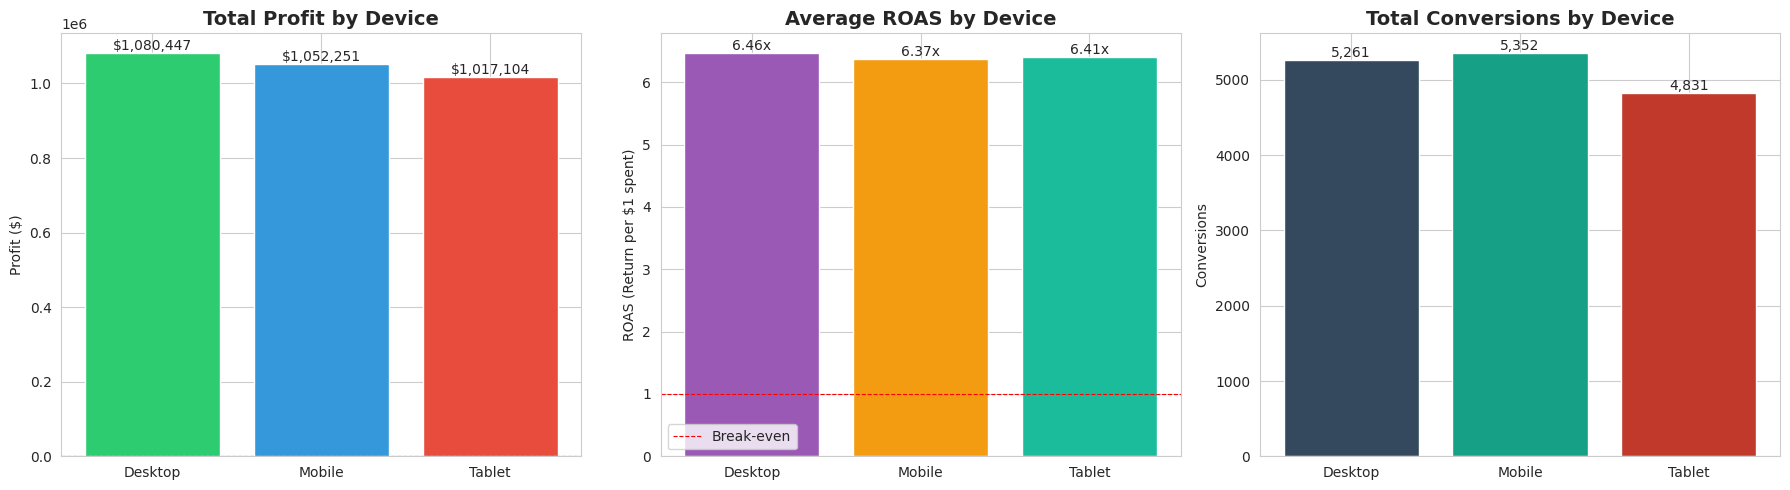

In [ ]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Device Profitability
device_profit = df.groupby('Device').agg({
    'Cost': 'sum',
    'Sale_Amount': 'sum',
    'Conversions': 'sum',
    'ROI': 'mean',
    'ROAS': 'mean'
}).round(2)

device_profit['Profit'] = device_profit['Sale_Amount'] - device_profit['Cost']

# Create subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Profit by Device
axes[0].bar(device_profit.index, device_profit['Profit'], color=['#2ecc71', '#3498db', '#e74c3c'])
axes[0].set_title('Total Profit by Device', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Profit ($)')
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
for i, v in enumerate(device_profit['Profit']):
    axes[0].text(i, v, f'${v:,.0f}', ha='center', va='bottom' if v > 0 else 'top')

# Plot 2: ROAS by Device
axes[1].bar(device_profit.index, device_profit['ROAS'], color=['#9b59b6', '#f39c12', '#1abc9c'])
axes[1].set_title('Average ROAS by Device', fontsize=14, fontweight='bold')
axes[1].set_ylabel('ROAS (Return per $1 spent)')
axes[1].axhline(y=1, color='red', linestyle='--', linewidth=0.8, label='Break-even')
for i, v in enumerate(device_profit['ROAS']):
    axes[1].text(i, v, f'{v:.2f}x', ha='center', va='bottom')
axes[1].legend()

# Plot 3: Conversions by Device
axes[2].bar(device_profit.index, device_profit['Conversions'], color=['#34495e', '#16a085', '#c0392b'])
axes[2].set_title('Total Conversions by Device', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Conversions')
for i, v in enumerate(device_profit['Conversions']):
    axes[2].text(i, v, f'{int(v):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

2. Best & Worst Performing Keywords


In [ ]:
print("\n" + "="*60)
print("KEYWORD ROI ANALYSIS")
print("="*60)

keyword_roi = df.groupby('Keyword').agg({
    'Cost': 'sum',
    'Sale_Amount': 'sum',
    'Conversions': 'sum',
    'ROI': 'mean',
    'ROAS': 'mean',
    'CPA': 'mean',
    'CTR': 'mean'
}).round(2)

keyword_roi['Total_Profit'] = (keyword_roi['Sale_Amount'] - keyword_roi['Cost']).round(2)
keyword_roi = keyword_roi.sort_values('ROAS', ascending=False)

print(keyword_roi)
print(f"\n💡 INSIGHT: Which keywords are wasting money? Which deserve more budget?")


KEYWORD ROI ANALYSIS
                             Cost  Sale_Amount  Conversions     ROI  ROAS  \
Keyword                                                                     
data analytics course    90792.01     634723.0       2601.0  566.86  6.64   
learn data analytics     93497.47     643359.0       2696.0  555.06  6.52   
data analytics training  85449.43     590040.0       2487.0  554.11  6.51   
analytics for data       89072.83     612229.0       2491.0  542.95  6.39   
online data analytics    93700.76     628577.0       2748.0  524.66  6.21   
data analytics online    85859.33     579245.0       2421.0  524.85  6.20   

                           CPA   CTR  Total_Profit  
Keyword                                             
data analytics course    32.82  4.82     543930.99  
learn data analytics     35.17  5.49     549861.53  
data analytics training  32.64  5.59     504590.57  
analytics for data       34.67  3.85     523156.17  
online data analytics    33.47  4.22     53

3. Device + Keyword Combinations (The Gold Mine)


In [ ]:
print("\n" + "="*60)
print("BEST DEVICE + KEYWORD COMBINATIONS")
print("="*60)

combo_performance = df.groupby(['Device', 'Keyword']).agg({
    'Cost': 'sum',
    'Sale_Amount': 'sum',
    'Conversions': 'sum',
    'ROI': 'mean',
    'ROAS': 'mean'
}).round(2)

combo_performance['Profit'] = (combo_performance['Sale_Amount'] - combo_performance['Cost']).round(2)
combo_performance = combo_performance.sort_values('Profit', ascending=False)

print("\nTOP 10 Most Profitable Combinations:")
print(combo_performance.head(10))

print("\nWORST 10 Combinations (losing money):")
print(combo_performance.tail(10))


BEST DEVICE + KEYWORD COMBINATIONS

TOP 10 Most Profitable Combinations:
                                     Cost  Sale_Amount  Conversions     ROI  \
Device  Keyword                                                               
Desktop data analytics course    33391.08     241063.0        942.0  584.18   
Mobile  learn data analytics     35482.23     239409.0       1089.0  540.85   
Tablet  online data analytics    31329.36     223946.0        919.0  541.18   
Mobile  online data analytics    32909.35     219257.0        994.0  532.46   
        data analytics training  31898.10     216707.0        901.0  543.69   
Desktop data analytics training  30824.16     215541.0        934.0  564.90   
Tablet  data analytics course    31755.24     213593.0        911.0  555.99   
Desktop analytics for data       30357.92     209859.0        893.0  543.57   
Mobile  analytics for data       30812.77     209181.0        833.0  577.02   
Desktop learn data analytics     28796.72     205271.0   

4. Temporal Patterns - Best Days to Run Ads


In [ ]:
print("\n" + "="*60)
print("TEMPORAL ANALYSIS - BEST DAYS")
print("="*60)

df['Day_of_Week'] = df['Ad_Date'].dt.day_name()
df['Day_of_Month'] = df['Ad_Date'].dt.day

day_performance = df.groupby('Day_of_Week').agg({
    'Cost': 'sum',
    'Sale_Amount': 'sum',
    'Conversions': 'sum',
    'ROI': 'mean',
    'ROAS': 'mean'
}).round(2)

day_performance['Profit'] = (day_performance['Sale_Amount'] - day_performance['Cost']).round(2)

# Order by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_performance = day_performance.reindex(day_order)

print(day_performance)
print(f"\n💡 INSIGHT: Which days should you run more/fewer ads?")


TEMPORAL ANALYSIS - BEST DAYS
                 Cost  Sale_Amount  Conversions     ROI  ROAS     Profit
Day_of_Week                                                             
Monday       73562.22     503415.0       2053.0  552.56  6.49  429852.78
Tuesday      56587.37     377385.0       1686.0  521.83  6.17  320797.63
Wednesday    86336.40     583823.0       2503.0  546.39  6.44  497486.60
Thursday     99432.52     688140.0       2785.0  555.66  6.53  588707.48
Friday       77369.37     523472.0       2217.0  521.02  6.16  446102.63
Saturday     75667.92     545291.0       2193.0  568.78  6.64  469623.08
Sunday       69416.03     466647.0       2007.0  537.44  6.34  397230.97

💡 INSIGHT: Which days should you run more/fewer ads?


5. Budget Efficiency - Where's the Waste?


In [ ]:
print("\n" + "="*60)
print("BUDGET WASTE ANALYSIS")
print("="*60)

# Identify campaigns with negative ROI
losing_campaigns = df[df['ROI'] < 0]
winning_campaigns = df[df['ROI'] > 0]

print(f"Losing campaigns: {len(losing_campaigns)} ({len(losing_campaigns)/len(df)*100:.1f}%)")
print(f"Winning campaigns: {len(winning_campaigns)} ({len(winning_campaigns)/len(df)*100:.1f}%)")
print(f"\nTotal money LOST on negative ROI campaigns: ${losing_campaigns['Cost'].sum() - losing_campaigns['Sale_Amount'].sum():.2f}")
print(f"Total PROFIT from positive ROI campaigns: ${winning_campaigns['Sale_Amount'].sum() - winning_campaigns['Cost'].sum():.2f}")

print("\nLosing campaigns by Device:")
print(losing_campaigns['Device'].value_counts())

print("\nLosing campaigns by Keyword:")
print(losing_campaigns['Keyword'].value_counts())


BUDGET WASTE ANALYSIS
Losing campaigns: 137 (5.3%)
Winning campaigns: 2366 (91.0%)

Total money LOST on negative ROI campaigns: $29838.38
Total PROFIT from positive ROI campaigns: $3039739.55

Losing campaigns by Device:
Device
Mobile     51
Desktop    45
Tablet     41
Name: count, dtype: int64

Losing campaigns by Keyword:
Keyword
data analytics online      32
online data analytics      25
learn data analytics       21
data analytics course      20
data analytics training    20
analytics for data         19
Name: count, dtype: int64


6. Conversion Funnel Analysis


In [ ]:
print("\n" + "="*60)
print("CONVERSION FUNNEL BREAKDOWN")
print("="*60)

funnel = pd.DataFrame({
    'Stage': ['Impressions', 'Clicks', 'Leads', 'Conversions'],
    'Count': [
        df['Impressions'].sum(),
        df['Clicks'].sum(),
        df['Leads'].sum(),
        df['Conversions'].sum()
    ]
})

funnel['Drop_off_Rate_%'] = funnel['Count'].pct_change() * -100
funnel['Conversion_%'] = (funnel['Count'] / funnel['Count'].iloc[0] * 100).round(2)

print(funnel)
print(f"\n💡 INSIGHT: Where are you losing the most people in the funnel?")


CONVERSION FUNNEL BREAKDOWN
         Stage       Count  Drop_off_Rate_%  Conversion_%
0  Impressions  11523724.0              NaN        100.00
1       Clicks    345725.0        96.999885          3.00
2        Leads     51050.0        85.233929          0.44
3  Conversions     15444.0        69.747307          0.13

💡 INSIGHT: Where are you losing the most people in the funnel?


In [ ]:
# Save your main dataset with all metrics
df.to_csv('marketing_data_FINAL.csv', index=False)
print("✅ Main dataset saved: marketing_data_FINAL.csv")

# Save aggregated tables for easier PowerBI use
# These pre-calculated tables make PowerBI dashboards faster

# 1. Device Performance Summary
device_summary = df.groupby('Device').agg({
    'Cost': 'sum',
    'Sale_Amount': 'sum',
    'Conversions': 'sum',
    'Clicks': 'sum',
    'Impressions': 'sum',
    'ROI': 'mean',
    'ROAS': 'mean',
    'CPA': 'mean',
    'CTR': 'mean'
}).round(2).reset_index()
device_summary['Profit'] = device_summary['Sale_Amount'] - device_summary['Cost']
device_summary.to_csv('device_summary.csv', index=False)

# 2. Keyword Performance Summary
keyword_summary = df.groupby('Keyword').agg({
    'Cost': 'sum',
    'Sale_Amount': 'sum',
    'Conversions': 'sum',
    'Clicks': 'sum',
    'Impressions': 'sum',
    'ROI': 'mean',
    'ROAS': 'mean',
    'CPA': 'mean',
    'CTR': 'mean'
}).round(2).reset_index()
keyword_summary['Profit'] = keyword_summary['Sale_Amount'] - keyword_summary['Cost']
keyword_summary.to_csv('keyword_summary.csv', index=False)

# 3. Device + Keyword Combinations
combo_summary = df.groupby(['Device', 'Keyword']).agg({
    'Cost': 'sum',
    'Sale_Amount': 'sum',
    'Conversions': 'sum',
    'ROI': 'mean',
    'ROAS': 'mean',
    'CPA': 'mean'
}).round(2).reset_index()
combo_summary['Profit'] = combo_summary['Sale_Amount'] - combo_summary['Cost']
combo_summary.to_csv('device_keyword_combo.csv', index=False)

# 4. Daily Performance (for time series)
daily_summary = df.groupby('Ad_Date').agg({
    'Cost': 'sum',
    'Sale_Amount': 'sum',
    'Conversions': 'sum',
    'Clicks': 'sum',
    'Impressions': 'sum',
    'ROI': 'mean',
    'ROAS': 'mean'
}).round(2).reset_index()
daily_summary['Profit'] = daily_summary['Sale_Amount'] - daily_summary['Cost']
daily_summary.to_csv('daily_performance.csv', index=False)

# 5. Day of Week Performance
df['Day_of_Week'] = df['Ad_Date'].dt.day_name()
dow_summary = df.groupby('Day_of_Week').agg({
    'Cost': 'sum',
    'Sale_Amount': 'sum',
    'Conversions': 'sum',
    'ROI': 'mean',
    'ROAS': 'mean'
}).round(2).reset_index()
dow_summary['Profit'] = dow_summary['Sale_Amount'] - dow_summary['Cost']
# Reorder days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_summary['Day_Order'] = dow_summary['Day_of_Week'].apply(lambda x: day_order.index(x))
dow_summary = dow_summary.sort_values('Day_Order').drop('Day_Order', axis=1)
dow_summary.to_csv('day_of_week_performance.csv', index=False)

# 6. Winning vs Losing Campaigns
df['Campaign_Status'] = df['ROI'].apply(lambda x: 'Winning' if x > 0 else 'Losing')
status_summary = df.groupby('Campaign_Status').agg({
    'Cost': 'sum',
    'Sale_Amount': 'sum',
    'Conversions': 'sum',
    'Ad_Date': 'count'  # Count of campaigns
}).round(2).reset_index()
status_summary.rename(columns={'Ad_Date': 'Campaign_Count'}, inplace=True)
status_summary['Profit'] = status_summary['Sale_Amount'] - status_summary['Cost']
status_summary.to_csv('campaign_status.csv', index=False)

print("\n✅ All PowerBI-ready files created:")
print("   1. marketing_data_FINAL.csv (main dataset)")
print("   2. device_summary.csv")
print("   3. keyword_summary.csv")
print("   4. device_keyword_combo.csv")
print("   5. daily_performance.csv")
print("   6. day_of_week_performance.csv")
print("   7. campaign_status.csv")

✅ Main dataset saved: marketing_data_FINAL.csv

✅ All PowerBI-ready files created:
   1. marketing_data_FINAL.csv (main dataset)
   2. device_summary.csv
   3. keyword_summary.csv
   4. device_keyword_combo.csv
   5. daily_performance.csv
   6. day_of_week_performance.csv
   7. campaign_status.csv
